# Подключение зависимостей

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Анализ предоставленных данных

In [45]:
train = pd.read_parquet('../input/train_processed.parquet')

In [46]:
train.head(5)

,id,start_date,end_date,duration,mean_value,min_value,max_value,count_values,median_value,cumulative_change,std_dev,iqr,skewness,kurtosis,y
0,19114,16801,18659,1858,0.023710,-4.840000,3.49,62,-0.110000,1.290000,1.337272,1.4525,-0.304166,1.889654,0.0
1,22769,16922,18262,1340,-0.310777,-3.534409,2.92,45,-0.274409,0.985591,1.556337,1.7500,-0.011952,-0.107257,1.0
2,76935,17226,18659,1433,-0.046042,-1.950000,2.61,48,-0.145000,-0.700000,1.065023,1.4925,0.377148,-0.272738,0.0
3,66297,16801,18231,1430,-0.130000,-2.220000,2.49,48,-0.345000,1.920000,1.158201,1.7750,0.112395,-0.849629,0.0
4,2191,16801,18475,1674,-0.270536,-2.500000,2.87,56,-0.475000,-2.060000,1.270529,1.9275,0.398655,-0.587199,0.0


## Предварительное рассмотрение

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 80000 non-null  int64  
 1   start_date         80000 non-null  int64  
 2   end_date           80000 non-null  int64  
 3   duration           80000 non-null  int64  
 4   mean_value         79912 non-null  float64
 5   min_value          79912 non-null  float64
 6   max_value          79912 non-null  float64
 7   count_values       80000 non-null  int64  
 8   median_value       79912 non-null  float64
 9   cumulative_change  79912 non-null  float64
 10  std_dev            79912 non-null  float64
 11  iqr                79912 non-null  float64
 12  skewness           79912 non-null  float64
 13  kurtosis           79912 non-null  float64
 14  y                  80000 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 9.2 MB


<div align="justify">


    Как мы видно из резульата, полученного при запуске команды `train.info()`, в наших данных есть пропущенные значения в столбцах с признаками:
1. **mean_value (среднее значение):** Среднее арифметическое всех значений в наборе данных. 
2. **min_value (минимальное значение):** Наименьшее значение в наборе данных. Помогает понять диапазон данных
3. **max_value (максимальное значение):** Наибольшее значение в наборе данных. Также показывает диапазон и помогает в обнаружении выбросов.
4. **median_value (медиана):** Значение, которое делит набор данных пополам, когда значения упорядочены.
5. **cumulative_change (накопительное изменение):** Это общее изменение значений за определённый период времени, показывающее общий тренд.
6. **std_dev (стандартное отклонение):** Мера разброса значений вокруг среднего. Чем больше стандартное отклонение, тем больше вариативность в данных.
7. **iqr (межквартильный размах):** Разница между 75-м и 25-м процентилями.
8. **skewness (асимметрия):** Мера симметрии распределения данных. Положительное значение указывает на смещение вправо, а отрицательное — влево.
9. **kurtosis (эксцесс):** Высокое значение эксцесса указывает на наличие выбросов, тогда как низкое значение указывает на плоское распределение.
Для того, чтобы узнать, сколько NaNов имеется в обучающей выборке для каждого признака, запустим следующую команду: 
</div>

In [48]:
train.isna().sum()

id                    0
start_date            0
end_date              0
duration              0
mean_value           88
min_value            88
max_value            88
count_values          0
median_value         88
cumulative_change    88
std_dev              88
iqr                  88
skewness             88
kurtosis             88
y                     0
dtype: int64

## Обработка пропущенных значений

Перейдем к обработке пропущенных значений.

In [125]:
def filter_nans(df):
    nan_info = df.isna().sum()
    for column in nan_info.index:
        if nan_info[column]:
            df[column] = df[column].fillna(df[column].mean())

In [126]:
filter_nans(train)

<div align="justify">
    
    Убедимся, что пропущенных значений среди наших данных больше нет.
</div>

In [127]:
train.isna().sum()

id                   0
start_date           0
end_date             0
duration             0
mean_value           0
min_value            0
max_value            0
count_values         0
median_value         0
cumulative_change    0
std_dev              0
iqr                  0
skewness             0
kurtosis             0
y                    0
dtype: int64

<div align="justify">
    
    Итак, мы видим, что данные успешно очищены от NaNов. Перейдем теперь к рассмотрению свойств наших признаков.

</div>

## Распределение признаков

In [128]:
def plot_distribution_grid(df):
    num_columns = 3
    
    features = df.drop(
        columns=['id', 'start_date', 'end_date', 'y']
    ).columns

    num_plots = len(features)
    num_rows = (num_plots + num_columns - 1) // num_columns
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.histplot(data=df, x=feature, hue='y', bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

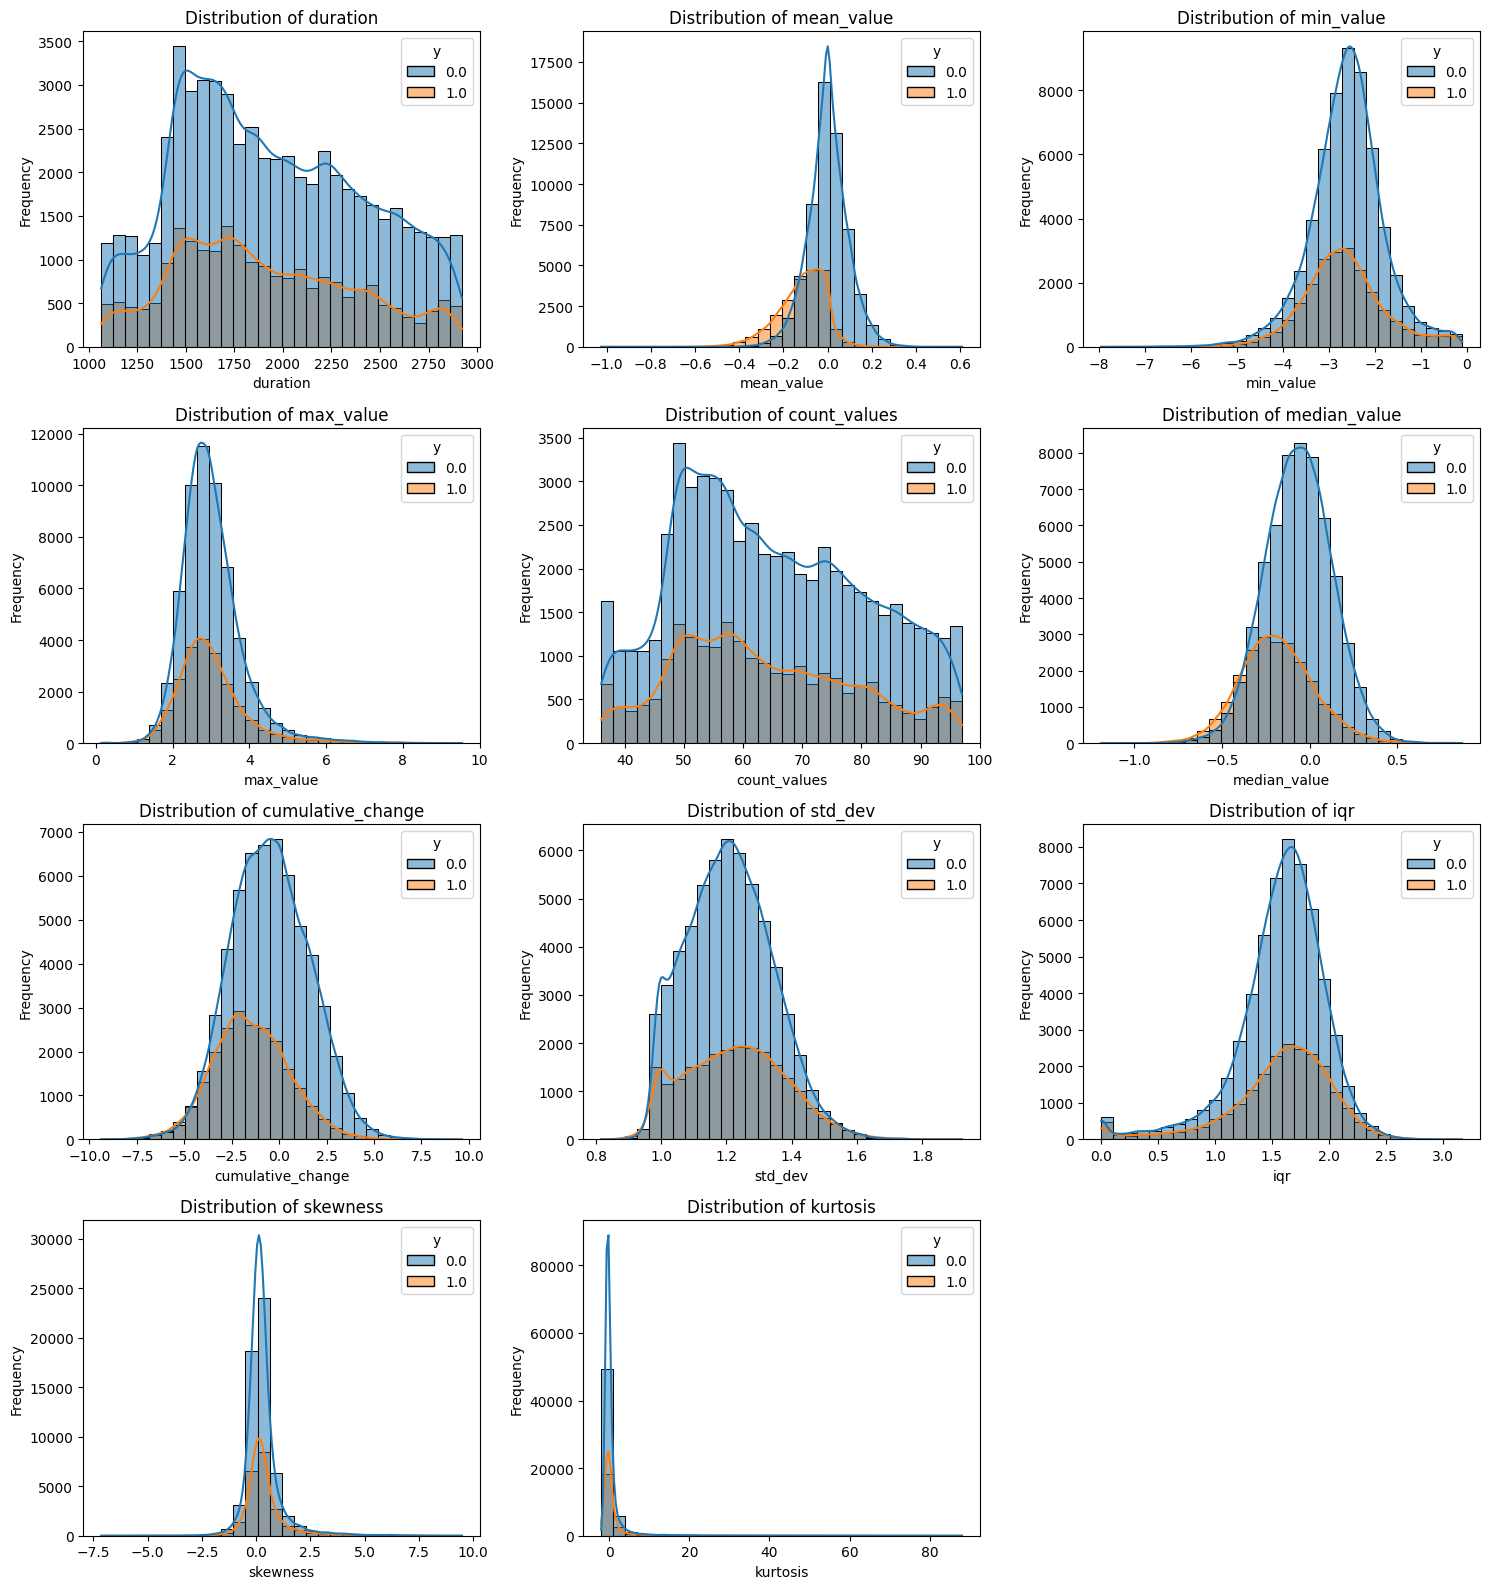

In [85]:
plot_distribution_grid(train)

<div align="justify">

    
    Рассмотрим распределения каждого из признаков:
1. **Продолжительность измерений.**
Для классов 0.0 и 1.0 видно, что распределение продолжительности событий отличается. Класс 0.0 (синий) более равномерно распределен, в то время как у класса 1.0 (оранжевый) наблюдается сдвиг в сторону меньших значений продолжительности. Это может означать, что класс 1.0 связан с более короткими временными интервалами.
2. **Среднее значение.**
Для класса 0.0 распределение сосредоточено около 0, а для класса 1.0 наблюдается сдвиг в сторону более отрицательных значений. Это может свидетельствовать о различиях в среднем значении между двумя классами.
3. **Минимальное значение.**
Минимальные значения для класса 1.0 более отрицательные, чем для класса 0.0. Это говорит о том, что минимальные значения для объектов класса 1.0 могут быть более экстремальными.
4. **Максимальное значение.**
Максимальные значения для класса 0.0 и 1.0 также различаются. У класса 1.0 максимальные значения немного ниже, что может быть признаком ограничения пределов значений.
5. **Количество значений.**
Количество наблюдений имеет некоторое смещение. Для класса 1.0 количество наблюдений меньше, чем для класса 0.0, что может указывать на меньшую частоту или объем данных для объектов класса 1.0.
6. **Медиана.**
Медианные значения для класса 1.0 имеют сдвиг в отрицательную сторону по сравнению с классом 0.0. Это может говорить о том, что данные класса 1.0 в среднем имеют меньшие значения.
7. **Накопительное изменение.**
Для класса 1.0 распределение сдвинуто ближе к отрицательным значениям, что может указывать на отрицательные кумулятивные изменения по сравнению с классом 0.0.
8. **Стандартное отклонение.**
У класса 1.0 меньшее стандартное отклонение, что свидетельствует о меньшей вариативности данных в этом классе.
9. **Межквартильный размах.**
Для класса 1.0 межквартильный размах меньше, что также указывает на меньшую дисперсию данных по сравнению с классом 0.0.
10. **Асимметрия.**
Асимметрия для обоих классов близка к 0, но распределение у класса 1.0 немного более узкое.
11. **Эксцесс.**
Распределение эксцесса сильно скошено, особенно для класса 0.0, что может говорить о том, что данные содержат больше выбросов в этом классе.
</div>

## Проверка на наличие выбросов

In [86]:
def plot_violin_grid(df):
    num_columns = 3
    
    features = df.drop(
        columns=['id', 'start_date', 'end_date', 'y']
    ).columns

    num_plots = len(features)
    num_rows = (num_plots + num_columns - 1) // num_columns

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.violinplot(data=df, x=feature, hue='y', ax=axes[i], inner='box')
        axes[i].set_title(f'Violin Plot of {feature}')
        axes[i].set_xlabel(feature)

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

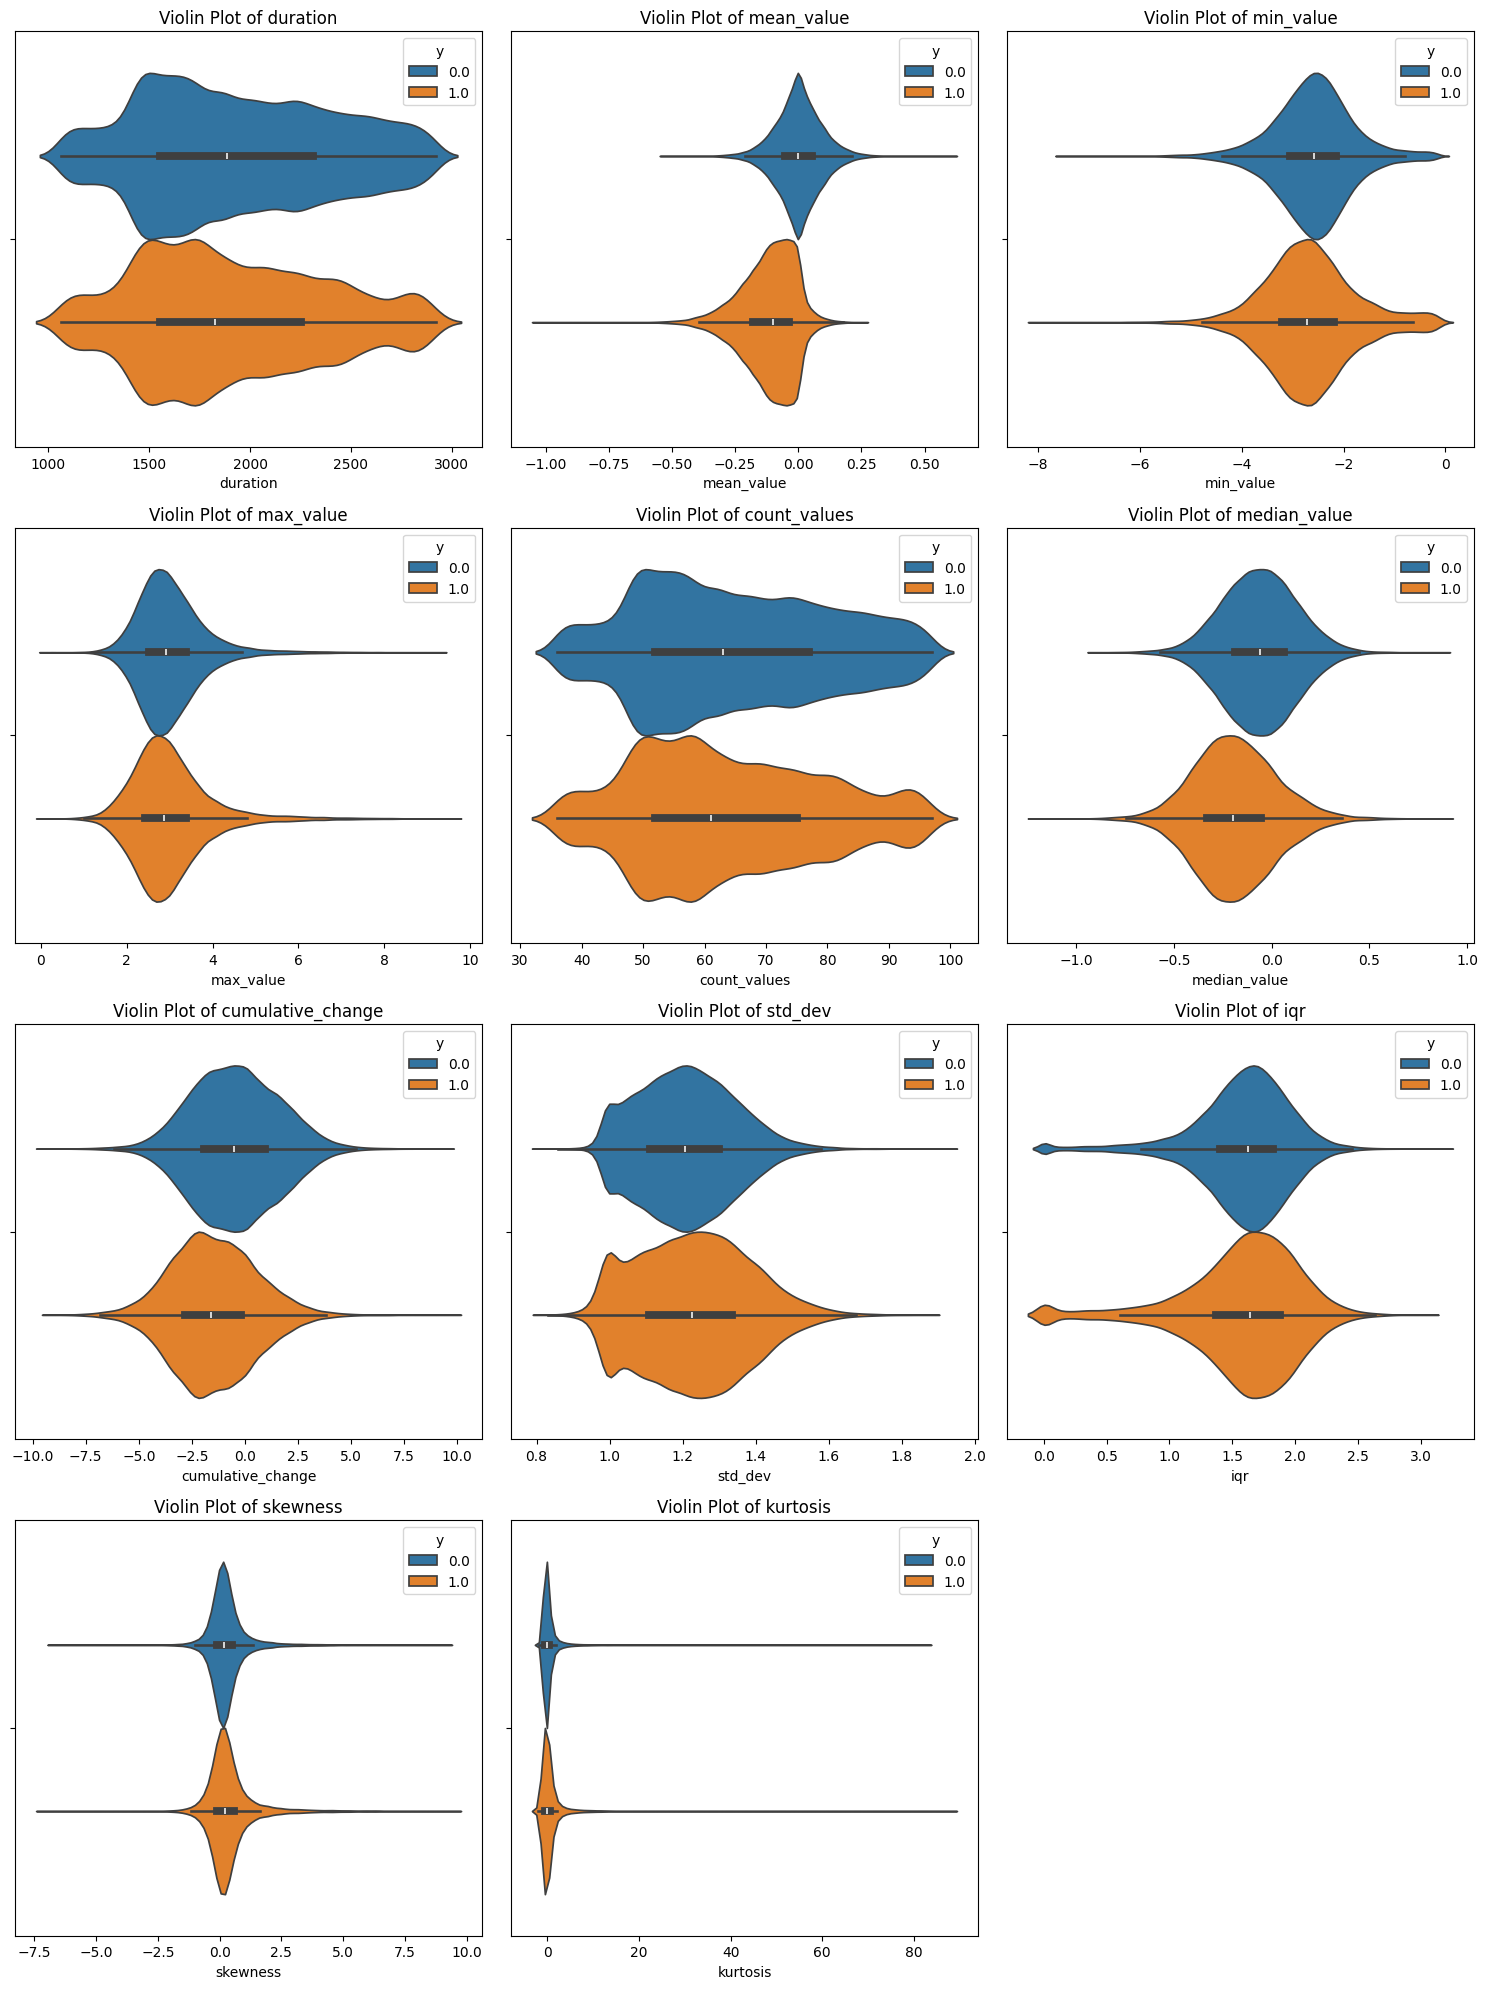

In [87]:
plot_violin_grid(train)

<div align="justify">

    
    В этих violin plots можно увидеть выбросы для некоторых признаков:
1. `mean_value`, `min_value`, `median_value`, `cumulative_change`, `skewness` и `kurtosis` — эти признаки имеют длинные и узкие "хвосты" на концах плотностей. Это указывает на присутствие выбросов. Особенно выделяются графики для классов "0" и "1" с явно выраженными длинными хвостами.
2. `duration`, `count_values`, `max_value`, `std_dev` и `iqr` — у этих признаков распределения более симметричные и "плотные" без ярко выраженных хвостов. Это указывает на то, что выбросов здесь меньше. Например, duration и count_values демонстрируют четкие распределения без значительных отклонений.
</div>

## Матрица корреляций

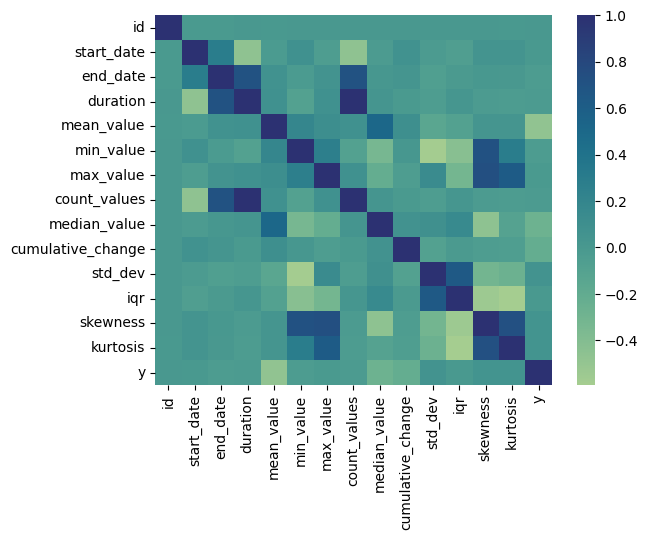

In [69]:
sns.heatmap(data=train.corr(), cmap='crest')
plt.show()

<div align="justify">
    
    На основе представленной матрицы корреляций можно сделать следующие выводы:
1. **Корреляция между признаками.**
В целом, большая часть признаков слабо коррелирует между собой, так как на матрице преобладают значения, близкие к 0 (светлые области). Это может указывать на то, что большинство признаков независимы, что хорошо для моделей машинного обучения, поскольку это снижает вероятность мультиколлинеарности.
2. **Сильная корреляция.**
Есть несколько признаков с заметной корреляцией. Например:
Параметры `duration` и `end_date` имеют относительно высокую корреляцию. Это логично, так как длительность обычно связана с конечной датой.
Признаки `median_value` и `mean_value` также демонстрируют значительную корреляцию, что типично, так как медиана и среднее обычно близки друг к другу, особенно в нормальных распределениях.
Признаки `std_dev` и `iqr` (межквартильный размах) также коррелируют, что указывает на то, что более высокая дисперсия данных ведет к увеличению диапазона значений.
3. **Целевая переменная.**
Класс `y` слабо коррелирует с большинством признаков. Это может указывать на то, что для успешного обучения модели могут потребоваться более сложные методы, такие как нелинейные классификаторы, которые способны улавливать слабые или сложные зависимости. Поэтому мы прибегнем к сравнительному анализу следующих моделей:
    * RandomForest;
    * XGBoost;
    * Catboost;
    * LightGBM.
5. **Отсутствие мультиколлинеарности.**
В матрице не так много признаков с очень высокой корреляцией, что говорит нам об отсутствии сильной мультиколлинеарности между ними. Это хорошо для моделей, так как такие признаки не будут избыточными.
</div>

# Сравнительный анализ моделей

In [101]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc

In [115]:
def compare_models(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
        yhat_proba = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, yhat_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(
            fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})'
        )

    plt.plot(
        [0, 1], [0, 1], color='navy', linestyle='--',
        label='Random Guessing'
    )
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Сравнение ROC кривых')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.show()

In [123]:
def rf_clf():
    # указываем параметры, дабы избежать переобучения
    return RandomForestClassifier(
        n_estimators=100, max_depth=5, min_samples_split=2, 
        min_samples_leaf=1, max_features='log2', random_state=42
    )


def xgb_clf():
    return XGBClassifier()


def cb_clf():
    return CatBoostClassifier(
        verbose=False)


def lgbm_clf():    
    return LGBMClassifier(
        objective='binary', verbose=0
    )

In [117]:
models = {
    'Random Forest': rf_clf(),
    'XGBoost': xgb_clf(), 
    'Catboost': cb_clf(),
    'LightGBM': lgbm_clf()
}

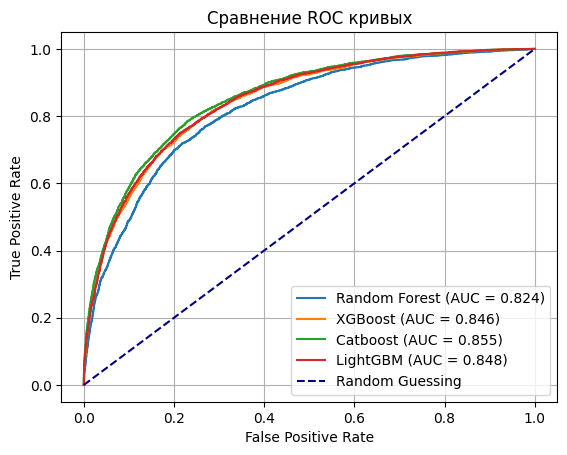

In [118]:
Xtrain = np.array(train.drop(columns=['id', 'y']))
ytrain = np.array(train.loc[:, 'y'])

m = int(Xtrain.shape[0] * .8)
compare_models(models, Xtrain[:m, :], ytrain[:m], 
                       Xtrain[m:, :], ytrain[m:])

<div align="justify">
    
    Мы сравнили успешность моделей при предсказании классов по неизвестным ей признакам и пришли к выводу, что лучше всех их перечисленных моделей классифицирует данные CatBoostClassifier.
</div>